In [1]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [2]:
df=pd.read_csv("./invisily_service_access_logs_07Sep20.csv")

In [3]:
#display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df.head()

,id,agent_id,client_physical_ip,client_pseudo_ip,service_id,service_physical_ip,service_pseudo_ip,client_tx_bytes,service_tx_bytes,difference_bytes,createdAt,updatedAt,log_start_time,log_end_time
0,26,7067,103.255.5.103,10.0.1.2,701,192.168.3.18,10.0.1.4,19347,52032,32685,2020-08-27 11:51:34,2020-08-27 11:51:34,1598508692,1598509007
1,32,7096,111.119.178.162,10.0.1.194,701,192.168.3.18,10.0.1.196,55508,137447,81939,2020-08-27 11:51:34,2020-08-27 11:51:34,1598509662,1598509776
2,48,7238,39.53.107.112,10.0.0.2,700,192.168.3.1,10.0.0.3,65615,505399,439784,2020-08-27 11:51:34,2020-08-27 11:51:34,1598507738,1598510917
3,74,7352,118.107.131.76,10.0.0.194,701,192.168.3.18,10.0.0.196,14768,77408,62640,2020-08-27 11:51:34,2020-08-27 11:51:34,1598510653,1598511031
4,82,7380,110.38.129.187,10.1.0.66,830,172.16.1.220,10.1.0.72,94493,116133,21640,2020-08-27 12:13:03,2020-08-27 12:13:03,1598508889,1598510156


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   1602 non-null   int64 
 1   agent_id             1602 non-null   int64 
 2   client_physical_ip   1602 non-null   object
 3   client_pseudo_ip     1602 non-null   object
 4   service_id           1602 non-null   int64 
 5   service_physical_ip  1602 non-null   object
 6   service_pseudo_ip    1602 non-null   object
 7   client_tx_bytes      1602 non-null   int64 
 8   service_tx_bytes     1602 non-null   int64 
 9   difference_bytes     1602 non-null   int64 
 10  createdAt            1602 non-null   object
 11  updatedAt            1602 non-null   object
 12  log_start_time       1602 non-null   int64 
 13  log_end_time         1602 non-null   int64 
dtypes: int64(8), object(6)
memory usage: 175.3+ KB


In [6]:
df.describe()

,id,agent_id,service_id,client_tx_bytes,service_tx_bytes,difference_bytes,log_start_time,log_end_time
count,1602.000000,1602.000000,1602.000000,1.602000e+03,1.602000e+03,1.602000e+03,1.602000e+03,1.602000e+03
mean,10016.644819,7268.179775,757.602372,6.526405e+05,8.844353e+06,8.719485e+06,1.598888e+09,1.598890e+09
std,5986.330058,112.044306,52.831020,3.325140e+06,6.245574e+07,6.117173e+07,2.208976e+05,2.209020e+05
min,26.000000,7008.000000,700.000000,4.000000e+01,4.000000e+01,0.000000e+00,1.598508e+09,1.598509e+09
25%,4666.500000,7192.000000,701.000000,1.077100e+04,2.489875e+04,1.215375e+04,1.598624e+09,1.598627e+09
50%,10066.000000,7297.000000,745.000000,3.684600e+04,1.230135e+05,7.220900e+04,1.598938e+09,1.598941e+09
75%,15474.500000,7367.000000,800.000000,1.718010e+05,7.311465e+05,5.909708e+05,1.599052e+09,1.599054e+09
max,19984.000000,7401.000000,839.000000,5.285412e+07,1.172291e+09,1.148977e+09,1.599219e+09,1.599220e+09


In [7]:
df.dtypes

id                      int64
agent_id                int64
client_physical_ip     object
client_pseudo_ip       object
service_id              int64
service_physical_ip    object
service_pseudo_ip      object
client_tx_bytes         int64
service_tx_bytes        int64
difference_bytes        int64
createdAt              object
updatedAt              object
log_start_time          int64
log_end_time            int64
dtype: object

In [8]:
df.groupby('agent_id').count()

,id,client_physical_ip,client_pseudo_ip,service_id,service_physical_ip,service_pseudo_ip,client_tx_bytes,service_tx_bytes,difference_bytes,createdAt,updatedAt,log_start_time,log_end_time
agent_id,,,,,,,,,,,,,
7008,6,6,6,6,6,6,6,6,6,6,6,6,6
7014,1,1,1,1,1,1,1,1,1,1,1,1,1
7026,17,17,17,17,17,17,17,17,17,17,17,17,17
7032,2,2,2,2,2,2,2,2,2,2,2,2,2
7039,6,6,6,6,6,6,6,6,6,6,6,6,6
7048,107,107,107,107,107,107,107,107,107,107,107,107,107
7067,22,22,22,22,22,22,22,22,22,22,22,22,22
7072,3,3,3,3,3,3,3,3,3,3,3,3,3
7079,2,2,2,2,2,2,2,2,2,2,2,2,2


Agent id's with maimum counts <br>
Agent Id.....Count <br>
  7297  .....    215 <br>
  7238  .....    198 <br>
  7380  .....    163 <br>
  7367  .....    132 <br>
  7048  .....    107

### select agent

In [9]:
def select_agent(df, agent_id):
    df_selected = df.loc[df['agent_id'] == agent_id]
    return df_selected

### show service ids

In [10]:
def show_unique_service_ids(df, agent_id):
    df_agent_selected = select_agent(df, agent_id)
    service_ids = df_agent_selected.groupby('service_id')['service_id'].first()
    print(service_ids)
 

### select service id

In [11]:
def select_service(df,service_id):
    df_selected = df.loc[df['service_id'] == service_id]
    return df_selected

### select features

In [12]:
def select_features(df, feature_list):
    df_selected = df[feature_list]
    return df_selected

In [13]:
features = ['difference_bytes']

### Normalize data

In [14]:
def normalize_data(df):
    
    """ Method for normalizing data using zscore
    
    Args:
        df (dataframe)
        
    Attributes:
        df (dataframe): original dataframe with selected rows and columns
        X (dataframe): consists of copy of df for processing
    
    Returns:
        X(dataframe): Normalized dataframe
        
    """
    
    X = df
    for col in X:
        X[col] = stats.zscore(X[col])
        
    return X

### For Single feature run this outlier detection dbscan


In [62]:

def outlier_detection_dbscan(eps, min_samples, X):
    
    """ Method for detecting multiple clusters, outliers and plotting them.
    
    Args:
        eps (float): The maximum distance between two samples for one to be 
                    considered as in the neighborhood of the other
        min_samples (int):The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
                        This includes the point itself
        X (dataframe): preprocessed datframe
        
    Attributes:
        ss (object): standardscaler object
        X (dataframe): consists of copy of df for processing
        db (object): DBSCAN bject initialized
        y_pred (results): results predicted by DBSCAN object
        cluster_0 (data points): consists of points in cluster 0
        cluster_1 (data points): consists of points in cluster 1
        cluster_2 (data points): consists of points in cluster 2
        cluster_3 (data points): consists of points in cluster 3
        cluster_4 (data points): consists of points in cluster 4
        cluster_5 (data points): consists of points in cluster 5
        outlier (data points): consists of points detected as outliers
    
    Returns: None
        
    """ 
    
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    
    cluster_0 = []
    cluster_1 = []
    cluster_2 = []
    cluster_3 = []
    cluster_4 = []
    cluster_5 = []
    outliers = []
    for i in range(len(X)):
        if db.labels_[i] == -1:
            outliers.append(X[i])
        elif db.labels_[i] == 0:
            cluster_0.append(X[i])
        elif db.labels_[i] == 1:
            cluster_1.append(X[i])
        elif db.labels_[i] == 2:
            cluster_2.append(X[i])
        elif db.labels_[i] == 3:
            cluster_3.append(X[i])
        elif db.labels_[i] == 4:
            cluster_4.append(X[i])
        elif db.labels_[i] == 5:
            cluster_5.append(X[i])

            
    if len(cluster_0) > 0:
        x_0 = []
        y_0 = []
        for i in range(len(cluster_0)):
            x_0.append(cluster_0[i][0])
            y_0.append(0) # append labels 
            
        plt.scatter(x_0, y_0,c='b', cmap='Paired')
        print("Length of cluster 0 : ", len(cluster_0))

        
    if len(cluster_1) > 0:
        x_1 = []
        y_1 = []
        for i in range(len(cluster_1)):
            x_1.append(cluster_1[i][0])
            y_1.append(1)
        plt.scatter(x_1, y_1,c='g', cmap='Paired')
        print("Length of cluster 1 : ", len(cluster_1))

    
    if len(cluster_2) > 0:
        x_2 = []
        y_2 = []
        for i in range(len(cluster_2)):
            x_2.append(cluster_2[i][0])
            y_2.append(2)
        plt.scatter(x_2, y_2,c='y', cmap='Paired')
        print("Length of cluster 2 : ", len(cluster_2))

            
    if len(cluster_3) >0:
        x_3 = []
        y_3 = []
        for i in range(len(cluster_3)):
            x_3.append(cluster_3[i][0])
            y_3.append(3)
        plt.scatter(x_3, y_3,c='b', marker = "1" ,cmap='Paired')
        print("Length of cluster 3 : ", len(cluster_3))

            
    if len(cluster_4) > 0:
        x_4 = []
        y_4 = []
        for i in range(len(cluster_4)):
            x_4.append(cluster_4[i][0])
            y_4.append(4)
        plt.scatter(x_4, y_4,c='b',marker = "2", cmap='Paired')
        print("Length of cluster 4 : ", len(cluster_4))

            
    if len(cluster_5) > 0:
        x_5 = []
        y_5 = []
        for i in range(len(cluster_5)):
            x_5.append(cluster_5[i][0])
            y_5.append(5)
        plt.scatter(x_5, y_5,c='b',marker = "3", cmap='Paired')
        print("Length of cluster 5 : ", len(cluster_5))

            
    if len(outliers) > 0:    
        # outliers
        x = []
        y = []
        for i in range(len(outliers)):
            x.append(outliers[i][0])
            y.append(-1)
        plt.scatter(x, y,c='r', marker = '*', cmap='Paired') #outlier
        print("Number of outliers : ", len(outliers))


In [63]:
def dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples):
    
    """ Method implementing the whole pipleline of work work dbscan
    
    Args:
        df (dataframe): unprocessed data
        epsilon (float): The maximum distance between two samples for one to be 
                    considered as in the neighborhood of the other
        min_samples (int):The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
                        This includes the point itself
        features (list): names of features needed
        
    Returns: None
        
    """ 
    
    df = select_agent(df, agent_id)
    df = select_service(df,service_id)
    df = select_features(df, feature_list)
#     df = normalize_data(df)
    outlier_detection_dbscan(epsilon, min_samples, df)


    
    
#     df = filter_ip(df)
#     df = select_features(df,features)
#     df = normalize_data(df)
#     outlier_detection_dbscan(epsilon, min_samples, df)
    

In [64]:
agent_id = 7297
show_unique_service_ids(df, agent_id)

service_id
701    701
703    703
737    737
747    747
794    794
795    795
799    799
800    800
801    801
820    820
838    838
839    839
Name: service_id, dtype: int64


Length of cluster 0 :  11
Length of cluster 1 :  2


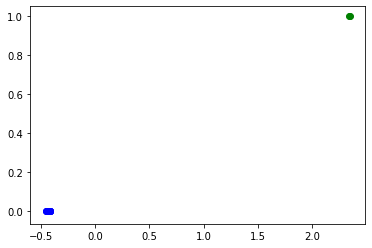

In [65]:
agent_id = 7297
service_id = 701
feature_list = ['difference_bytes']
epsilon = 0.1
min_samples = 2
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  11
Length of cluster 1 :  2


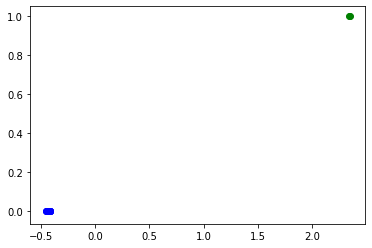

In [66]:
agent_id = 7297
service_id = 701
feature_list = ['difference_bytes']
epsilon = 0.2
min_samples = 2
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  28
Number of outliers :  1


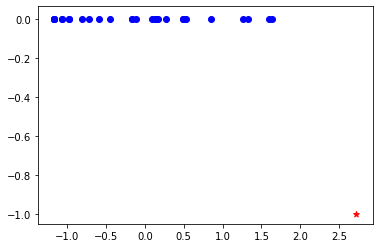

In [67]:
agent_id = 7297
service_id = 820
feature_list = ['difference_bytes']
epsilon = 0.5
min_samples = 2
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  28
Number of outliers :  1


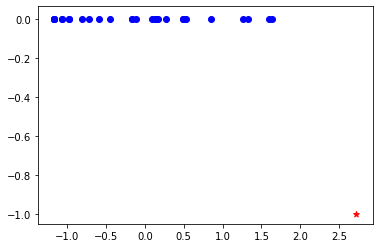

In [68]:
agent_id = 7297
service_id = 820
feature_list = ['difference_bytes']
epsilon = 0.9
min_samples = 2
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  4
Length of cluster 1 :  8
Number of outliers :  17


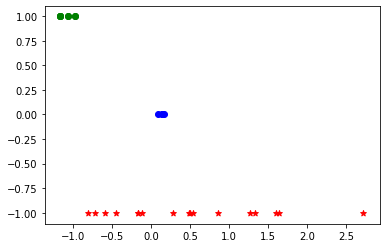

In [69]:
agent_id = 7297
service_id = 820
feature_list = ['difference_bytes']
epsilon = 0.1
min_samples = 4
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  8
Number of outliers :  21


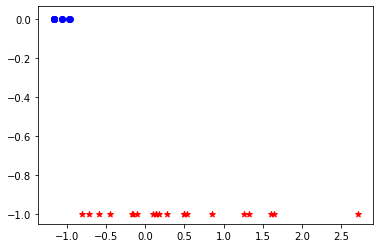

In [70]:
agent_id = 7297
service_id = 820
feature_list = ['difference_bytes']
epsilon = 0.1
min_samples = 8
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Number of outliers :  29


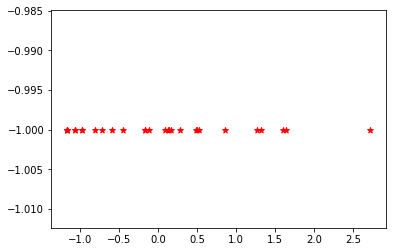

In [71]:
agent_id = 7297
service_id = 820
feature_list = ['difference_bytes']
epsilon = 0.1
min_samples = 10
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Number of outliers :  29


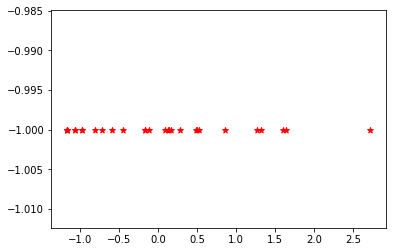

In [72]:
agent_id = 7297
service_id = 820
feature_list = ['difference_bytes']
epsilon = 0.1
min_samples = 20
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  2
Length of cluster 1 :  2
Length of cluster 2 :  4
Length of cluster 3 :  8
Length of cluster 4 :  3
Length of cluster 5 :  3
Number of outliers :  5


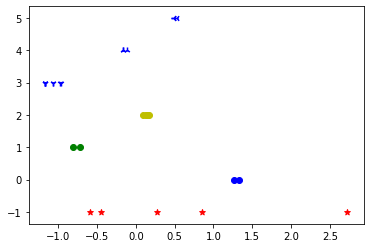

In [73]:
agent_id = 7297
service_id = 820
feature_list = ['difference_bytes']
epsilon = 0.1
min_samples = 2
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  8
Number of outliers :  21


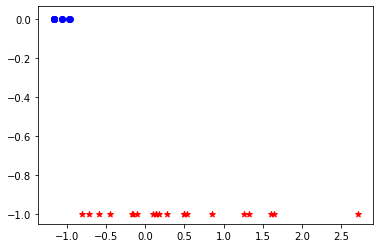

In [74]:
agent_id = 7297
service_id = 820
feature_list = ['difference_bytes']
epsilon = 0.1
min_samples = 6
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Number of outliers :  29


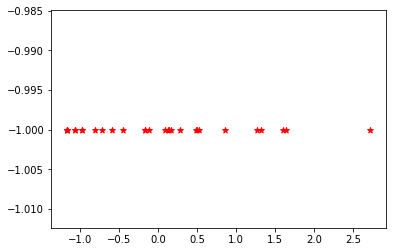

In [75]:
agent_id = 7297
service_id = 820
feature_list = ['difference_bytes']
epsilon = 0.1
min_samples = 9
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Number of outliers :  29


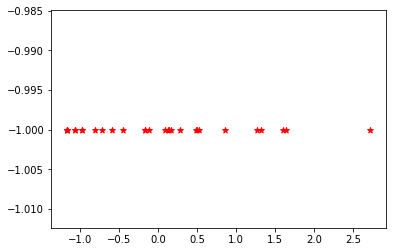

In [76]:
agent_id = 7297
service_id = 820
feature_list = ['difference_bytes']
epsilon = 0.1
min_samples = 12
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Number of outliers :  15


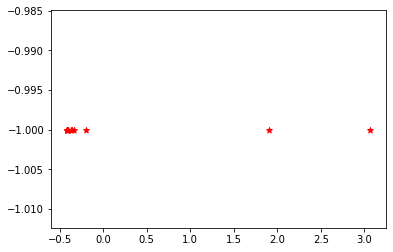

In [77]:
agent_id = 7297
service_id = 839
feature_list = ['difference_bytes']
epsilon = 0.1
min_samples = 20
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  13
Number of outliers :  2


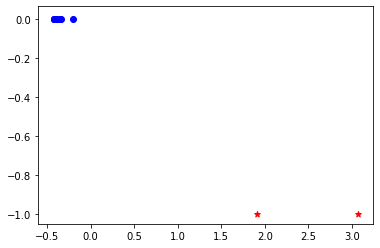

In [78]:
agent_id = 7297
service_id = 839
feature_list = ['difference_bytes']
epsilon = 0.3
min_samples = 2
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  13
Number of outliers :  2


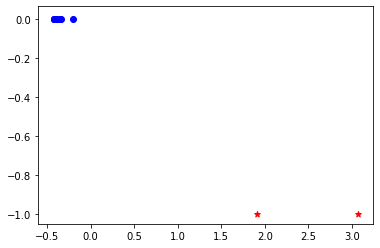

In [79]:
agent_id = 7297
service_id = 839
feature_list = ['difference_bytes']
epsilon = 0.7
min_samples = 2
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  13
Number of outliers :  2


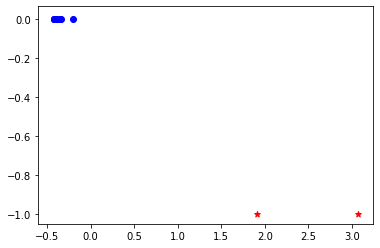

In [80]:
agent_id = 7297
service_id = 839
feature_list = ['difference_bytes']
epsilon = 0.9
min_samples = 2
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  15


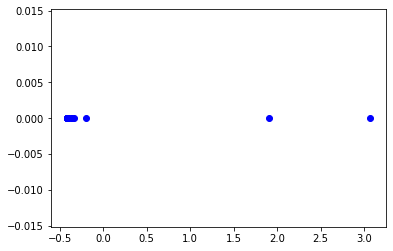

In [81]:
agent_id = 7297
service_id = 839
feature_list = ['difference_bytes']
epsilon = 3
min_samples = 2
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Number of outliers :  15


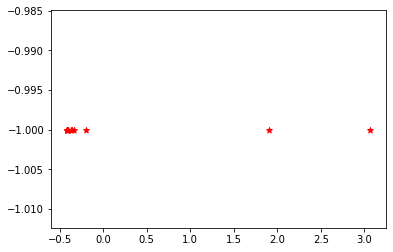

In [82]:
agent_id = 7297
service_id = 839
feature_list = ['difference_bytes']
epsilon = 0.9
min_samples = 15
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  12
Number of outliers :  3


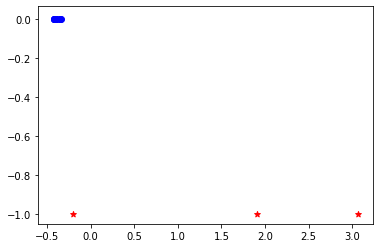

In [83]:
agent_id = 7297
service_id = 839
feature_list = ['difference_bytes']
epsilon = 0.1
min_samples = 2
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  13
Number of outliers :  2


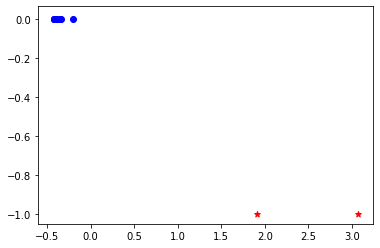

In [84]:
agent_id = 7297
service_id = 839
feature_list = ['difference_bytes']
epsilon = 0.5
min_samples = 2
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  13
Number of outliers :  2


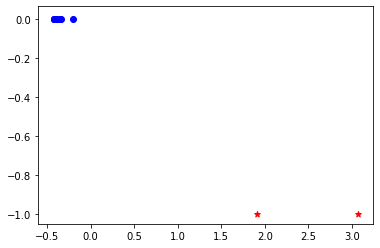

In [86]:
agent_id = 7297
service_id = 839
feature_list = ['difference_bytes']
epsilon = 0.6
min_samples = 10
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

### For multiple features run this outlier detection dbscan

In [54]:

def outlier_detection_dbscan(eps, min_samples, X):
    
    """ Method for detecting multiple clusters, outliers and plotting them.
    
    Args:
        eps (float): The maximum distance between two samples for one to be 
                    considered as in the neighborhood of the other
        min_samples (int):The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
                        This includes the point itself
        X (dataframe): preprocessed datframe
        
    Attributes:
        ss (object): standardscaler object
        X (dataframe): consists of copy of df for processing
        db (object): DBSCAN bject initialized
        y_pred (results): results predicted by DBSCAN object
        cluster_0 (data points): consists of points in cluster 0
        cluster_1 (data points): consists of points in cluster 1
        cluster_2 (data points): consists of points in cluster 2
        cluster_3 (data points): consists of points in cluster 3
        cluster_4 (data points): consists of points in cluster 4
        cluster_5 (data points): consists of points in cluster 5
        outlier (data points): consists of points detected as outliers
    
    Returns: None
        
    """ 
    
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    
    cluster_0 = []
    cluster_1 = []
    cluster_2 = []
    cluster_3 = []
    cluster_4 = []
    cluster_5 = []
    outliers = []
    for i in range(len(X)):
        if db.labels_[i] == -1:
            outliers.append(X[i])
        elif db.labels_[i] == 0:
            cluster_0.append(X[i])
        elif db.labels_[i] == 1:
            cluster_1.append(X[i])
        elif db.labels_[i] == 2:
            cluster_2.append(X[i])
        elif db.labels_[i] == 3:
            cluster_3.append(X[i])
        elif db.labels_[i] == 4:
            cluster_4.append(X[i])
        elif db.labels_[i] == 5:
            cluster_5.append(X[i])

            
    if len(cluster_0) > 0:
        x_0 = []
        y_0 = []
        for i in range(len(cluster_0)):
            x_0.append(cluster_0[i][0])
            y_0.append(cluster_0[i][1]) # append labels 
            
        plt.scatter(x_0, y_0,c='b', cmap='Paired')
        print("Length of cluster 0 : ", len(cluster_0))

        
    if len(cluster_1) > 0:
        x_1 = []
        y_1 = []
        for i in range(len(cluster_1)):
            x_1.append(cluster_1[i][0])
            y_1.append(cluster_1[i][1])
        plt.scatter(x_1, y_1,c='g', cmap='Paired')
        print("Length of cluster 1 : ", len(cluster_1))

    
    if len(cluster_2) > 0:
        x_2 = []
        y_2 = []
        for i in range(len(cluster_2)):
            x_2.append(cluster_2[i][0])
            y_2.append(cluster_2[i][1])
        plt.scatter(x_2, y_2,c='y', cmap='Paired')
        print("Length of cluster 2 : ", len(cluster_2))

            
    if len(cluster_3) >0:
        x_3 = []
        y_3 = []
        for i in range(len(cluster_3)):
            x_3.append(cluster_3[i][0])
            y_3.append(cluster_3[i][1])
        plt.scatter(x_3, y_3,c='b', marker = "1" ,cmap='Paired')
        print("Length of cluster 3 : ", len(cluster_3))

            
    if len(cluster_4) > 0:
        x_4 = []
        y_4 = []
        for i in range(len(cluster_4)):
            x_4.append(cluster_4[i][0])
            y_4.append(cluster_4[i][1])
        plt.scatter(x_4, y_4,c='b',marker = "2", cmap='Paired')
        print("Length of cluster 4 : ", len(cluster_4))

            
    if len(cluster_5) > 0:
        x_5 = []
        y_5 = []
        for i in range(len(cluster_5)):
            x_5.append(cluster_5[i][0])
            y_5.append(cluster_5[i][1])
        plt.scatter(x_5, y_5,c='b',marker = "3", cmap='Paired')
        print("Length of cluster 5 : ", len(cluster_5))

            
    if len(outliers) > 0:    
        # outliers
        x = []
        y = []
        for i in range(len(outliers)):
            x.append(outliers[i][0])
            y.append(outliers[i][1])
        plt.scatter(x, y,c='r', marker = '*', cmap='Paired') #outlier
        print("Number of outliers : ", len(outliers))


Number of outliers :  29


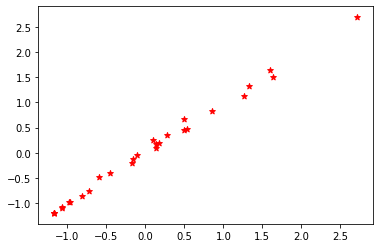

In [55]:
agent_id = 7297
service_id = 820
feature_list = ['service_tx_bytes', 'client_tx_bytes']
epsilon = 0.1
min_samples = 10
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  12
Length of cluster 1 :  11
Number of outliers :  6


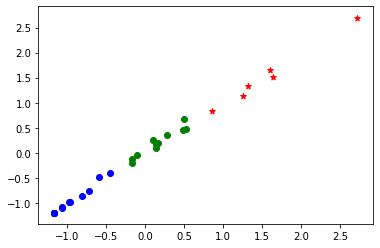

In [56]:
agent_id = 7297
service_id = 820
feature_list = ['service_tx_bytes', 'client_tx_bytes']
epsilon = 0.6
min_samples = 10
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  26
Number of outliers :  3


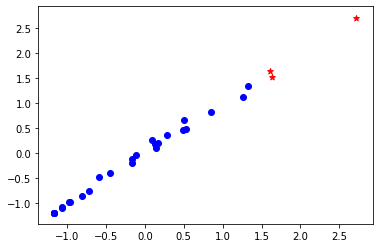

In [57]:
agent_id = 7297
service_id = 820
feature_list = ['service_tx_bytes', 'client_tx_bytes']
epsilon = 1
min_samples = 10
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Number of outliers :  29


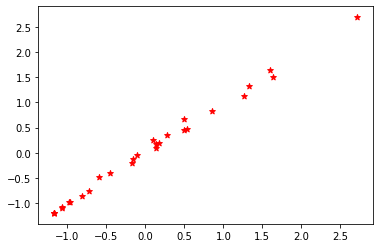

In [58]:
agent_id = 7297
service_id = 820
feature_list = ['service_tx_bytes', 'client_tx_bytes']
epsilon = 0.1
min_samples = 20
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Number of outliers :  29


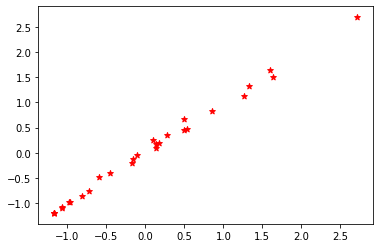

In [59]:
agent_id = 7297
service_id = 820
feature_list = ['service_tx_bytes', 'client_tx_bytes']
epsilon = 0.6
min_samples = 20
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  24
Number of outliers :  5


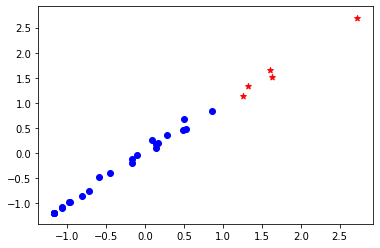

In [60]:
agent_id = 7297
service_id = 820
feature_list = ['service_tx_bytes', 'client_tx_bytes']
epsilon = 1.6
min_samples = 20
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  13
Number of outliers :  2


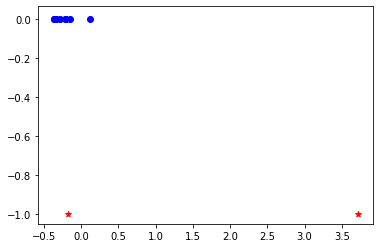

In [87]:
agent_id = 7297
service_id = 839
feature_list = ['service_tx_bytes', 'client_tx_bytes']
epsilon = 0.6
min_samples = 10
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  11
Number of outliers :  4


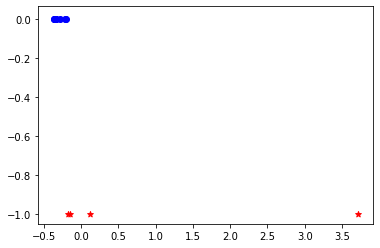

In [88]:
agent_id = 7297
service_id = 839
feature_list = ['service_tx_bytes', 'client_tx_bytes']
epsilon = 0.1
min_samples = 10
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  13
Number of outliers :  2


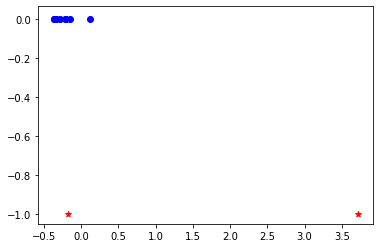

In [89]:
agent_id = 7297
service_id = 839
feature_list = ['service_tx_bytes', 'client_tx_bytes']
epsilon = 0.6
min_samples = 2
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  58
Length of cluster 1 :  2
Number of outliers :  1


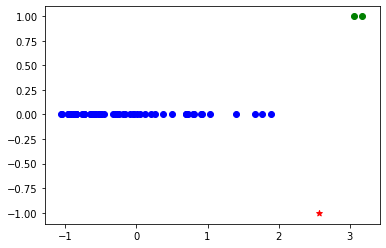

In [113]:
agent_id = 7238
service_id = 700
feature_list = ['service_tx_bytes', 'client_tx_bytes']
epsilon = 0.5
min_samples = 2
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

In [92]:
agent_id = 7238
show_unique_service_ids(df, agent_id)

service_id
700    700
701    701
706    706
725    725
741    741
770    770
799    799
800    800
801    801
809    809
818    818
820    820
834    834
838    838
Name: service_id, dtype: int64


Length of cluster 0 :  10
Length of cluster 1 :  5
Number of outliers :  46


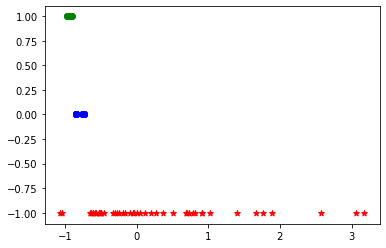

In [114]:
agent_id = 7238
service_id = 700
feature_list = ['service_tx_bytes', 'client_tx_bytes']
epsilon = 0.1
min_samples = 10
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  17
Length of cluster 1 :  3
Length of cluster 2 :  11
Number of outliers :  30


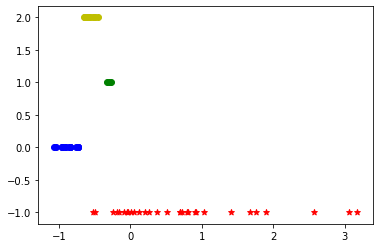

In [115]:
agent_id = 7238
service_id = 700
feature_list = ['service_tx_bytes', 'client_tx_bytes']
epsilon = 0.1
min_samples = 3
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  16
Length of cluster 1 :  8
Number of outliers :  37


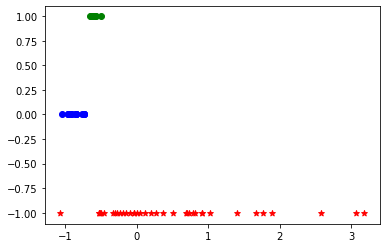

In [116]:
agent_id = 7238
service_id = 700
feature_list = ['service_tx_bytes', 'client_tx_bytes']
epsilon = 0.1
min_samples = 6
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  44
Length of cluster 1 :  4
Length of cluster 2 :  10
Number of outliers :  3


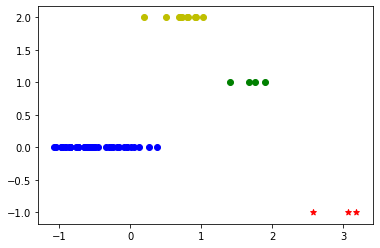

In [117]:
agent_id = 7238
service_id = 700
feature_list = ['service_tx_bytes', 'client_tx_bytes']
epsilon = 0.4
min_samples = 3
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  44
Number of outliers :  17


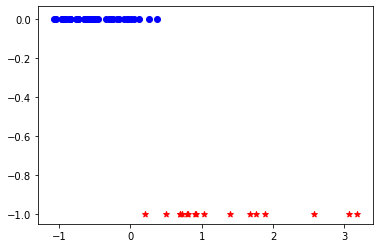

In [118]:
agent_id = 7238
service_id = 700
feature_list = ['service_tx_bytes', 'client_tx_bytes']
epsilon = 0.8
min_samples = 20
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  10
Length of cluster 1 :  5
Number of outliers :  46


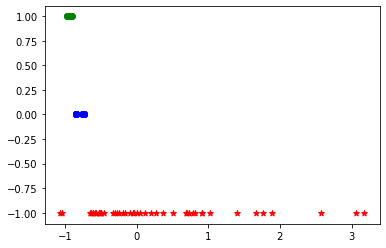

In [119]:
agent_id = 7238
service_id = 700
feature_list = ['service_tx_bytes', 'client_tx_bytes']
epsilon = 0.1
min_samples = 10
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  36
Number of outliers :  25


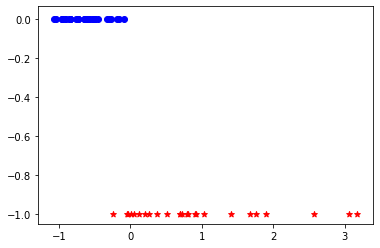

In [120]:
agent_id = 7238
service_id = 700
feature_list = ['service_tx_bytes', 'client_tx_bytes']
epsilon = 0.3
min_samples = 10
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  55
Number of outliers :  6


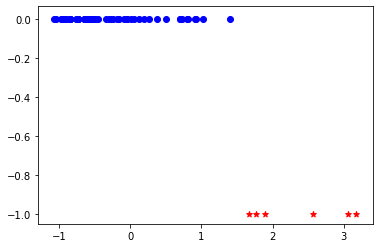

In [121]:
agent_id = 7238
service_id = 700
feature_list = ['service_tx_bytes', 'client_tx_bytes']
epsilon = 0.8
min_samples = 10
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  43
Length of cluster 1 :  2
Length of cluster 2 :  9
Length of cluster 3 :  2
Number of outliers :  5


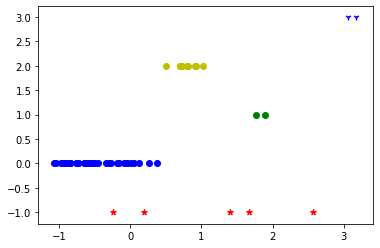

In [122]:
agent_id = 7238
service_id = 700
feature_list = ['service_tx_bytes', 'client_tx_bytes']
epsilon = 0.3
min_samples = 2
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  39
Number of outliers :  22


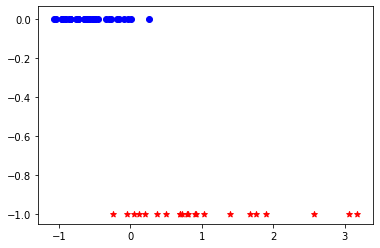

In [123]:
agent_id = 7238
service_id = 700
feature_list = ['service_tx_bytes', 'client_tx_bytes']
epsilon = 0.3
min_samples = 6
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  58
Length of cluster 1 :  2
Number of outliers :  1


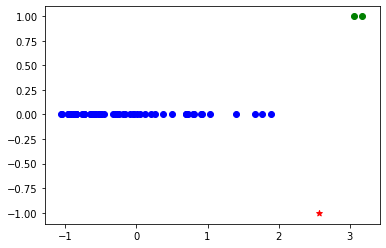

In [124]:
agent_id = 7238
service_id = 700
feature_list = ['service_tx_bytes', 'client_tx_bytes']
epsilon = 0.6
min_samples = 2
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  56
Number of outliers :  5


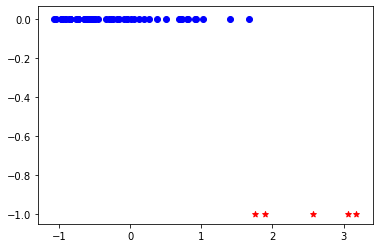

In [125]:
agent_id = 7238
service_id = 700
feature_list = ['service_tx_bytes', 'client_tx_bytes']
epsilon = 0.8
min_samples = 9
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  43
Length of cluster 1 :  2
Length of cluster 2 :  9
Length of cluster 3 :  2
Number of outliers :  5


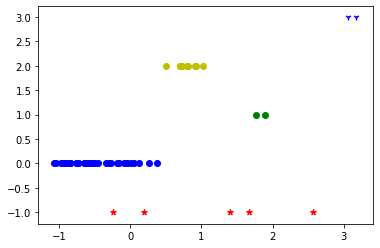

In [126]:
agent_id = 7238
service_id = 700
feature_list = ['service_tx_bytes', 'client_tx_bytes']
epsilon = 0.3
min_samples = 2
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  17
Length of cluster 1 :  2
Length of cluster 2 :  3
Length of cluster 3 :  11
Length of cluster 4 :  2
Number of outliers :  26


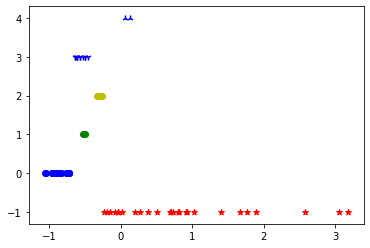

In [127]:
agent_id = 7238
service_id = 700
feature_list = ['service_tx_bytes', 'client_tx_bytes']
epsilon = 0.1
min_samples = 2
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  15
Length of cluster 1 :  8
Number of outliers :  38


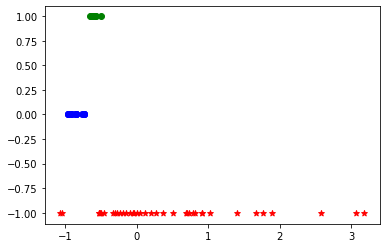

In [128]:
agent_id = 7238
service_id = 700
feature_list = ['service_tx_bytes', 'client_tx_bytes']
epsilon = 0.1
min_samples = 7
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  10
Length of cluster 1 :  5
Number of outliers :  46


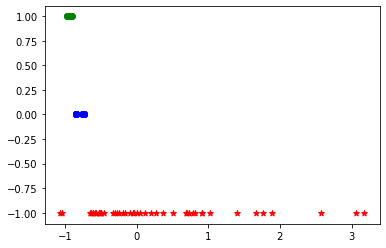

In [129]:
agent_id = 7238
service_id = 700
feature_list = ['service_tx_bytes', 'client_tx_bytes']
epsilon = 0.1
min_samples = 9
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Number of outliers :  61


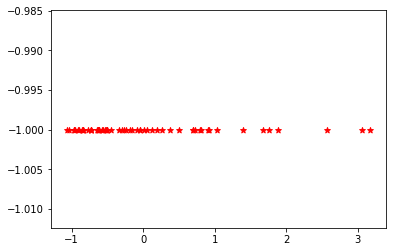

In [130]:
agent_id = 7238
service_id = 700
feature_list = ['service_tx_bytes', 'client_tx_bytes']
epsilon = 0.1
min_samples = 13
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  43
Length of cluster 1 :  2
Length of cluster 2 :  9
Length of cluster 3 :  2
Number of outliers :  5


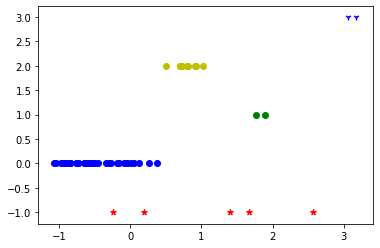

In [131]:
agent_id = 7238
service_id = 700
feature_list = ['service_tx_bytes', 'client_tx_bytes']
epsilon = 0.3
min_samples = 2
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  55
Number of outliers :  6


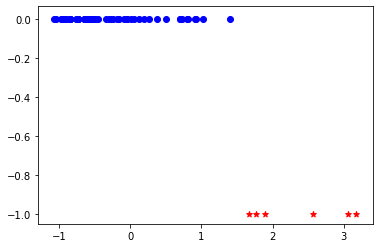

In [132]:
agent_id = 7238
service_id = 700
feature_list = ['service_tx_bytes', 'client_tx_bytes']
epsilon = 0.6
min_samples = 7
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  43
Number of outliers :  18


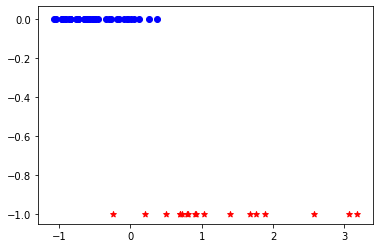

In [133]:
agent_id = 7238
service_id = 700
feature_list = ['service_tx_bytes', 'client_tx_bytes']
epsilon = 0.7
min_samples = 20
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)